<a href="https://colab.research.google.com/github/Topolewski-Kamil/dKnn/blob/main/keras_dis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
%tensorflow_version 2.x
import tensorflow as tf

In [17]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras import backend as K
import matplotlib
import matplotlib.pyplot as plt

In [18]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [19]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(64, kernel_size=(8, 8), strides=(2,2), padding="same", activation="relu", input_shape=x_train.shape[1:]),
        layers.Conv2D(128, kernel_size=(6, 6), strides=(2,2), padding="valid", activation="relu"),
        layers.Conv2D(128, kernel_size=(5, 5), strides=(1,1), padding="valid", activation="relu"),
        layers.Flatten(),
        # layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        4160      
                                                                 
 conv2d_4 (Conv2D)           (None, 5, 5, 128)         295040    
                                                                 
 conv2d_5 (Conv2D)           (None, 1, 1, 128)         409728    
                                                                 
 flatten_1 (Flatten)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 710,218
Trainable params: 710,218
Non-trainable params: 0
_________________________________________________________________


In [20]:
batch_size = 500
epochs = 8

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/8
108/108 [==============================] - 6s 50ms/step - loss: 0.3679 - accuracy: 0.8897 - val_loss: 0.1026 - val_accuracy: 0.9702
Epoch 2/8
108/108 [==============================] - 5s 47ms/step - loss: 0.0830 - accuracy: 0.9746 - val_loss: 0.0574 - val_accuracy: 0.9815
Epoch 3/8
108/108 [==============================] - 5s 47ms/step - loss: 0.0544 - accuracy: 0.9831 - val_loss: 0.0518 - val_accuracy: 0.9840
Epoch 4/8
108/108 [==============================] - 5s 47ms/step - loss: 0.0399 - accuracy: 0.9880 - val_loss: 0.0473 - val_accuracy: 0.9855
Epoch 5/8
108/108 [==============================] - 5s 47ms/step - loss: 0.0307 - accuracy: 0.9901 - val_loss: 0.0546 - val_accuracy: 0.9858
Epoch 6/8
108/108 [==============================] - 5s 48ms/step - loss: 0.0251 - accuracy: 0.9924 - val_loss: 0.0415 - val_accuracy: 0.9892
Epoch 7/8
108/108 [==============================] - 5s 47ms/step - loss: 0.0194 - accuracy: 0.9941 - val_loss: 0.0398 - val_accuracy: 0.9898
Epoch 

In [21]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.035352423787117004
Test accuracy: 0.9889000058174133


In [7]:
for layer in model.layers:
  print(layer.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 14, 14, 64), dtype=tf.float32, name=None), name='conv2d/Relu:0', description="created by layer 'conv2d'")
KerasTensor(type_spec=TensorSpec(shape=(None, 5, 5, 128), dtype=tf.float32, name=None), name='conv2d_1/Relu:0', description="created by layer 'conv2d_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1, 1, 128), dtype=tf.float32, name=None), name='conv2d_2/Relu:0', description="created by layer 'conv2d_2'")
KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='flatten/Reshape:0', description="created by layer 'flatten'")
KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='dense/BiasAdd:0', description="created by layer 'dense'")
KerasTensor(type_spec=TensorSpec(shape=(None, 10), dtype=tf.float32, name=None), name='dense_1/Softmax:0', description="created by layer 'dense_1'")


In [8]:
arr = [1,2,3,4,5]
arr[0:3]

[1, 2, 3]

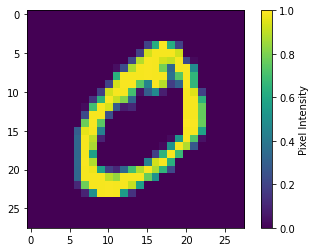

In [9]:
# Plot one of the mnist images
plt.imshow( x_train[1].reshape((28, 28), order='F'))
cbar = plt.colorbar()
cbar.set_label('Pixel Intensity')
plt.show()

In [10]:
x_test.shape

(10000, 28, 28, 1)

In [11]:
layerIndex = 1
func = K.function([model.get_layer(index=0).input], model.get_layer(index=layerIndex).output)
layerOutput = func(x_train)  # input_data is a numpy array
print(layerOutput)

[[[[3.19602415e-02 5.82224667e-01 9.53250527e-01 ... 0.00000000e+00
    0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 6.33800745e-01 0.00000000e+00 ... 0.00000000e+00
    0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 1.19393146e+00 0.00000000e+00 ... 0.00000000e+00
    0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    0.00000000e+00 0.00000000e+00]]

  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 9.03749168e-01
    1.23895504e-01 0.00000000e+00]
   [1.03792357e+00 0.00000000e+00 1.64660192e+00 ... 9.00753796e-01
    0.00000000e+00 9.59440649e-01]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.53154248e-01
    0.00000000e+00 5.48127294e-01]
   [2.28441164e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    0.00000000e+00 1.26010358e+00]
   [3.40593368e-01 0.00000000e+00 1.41670197e-01 ... 0.00000000e+00
   

In [22]:
def reshaped_layer(model, x):
    #function to get the layer wise output representation of the model for data x
    layer_output = []
    for i in range(3):
        layer = model.layers[i]
        print(layer)
        l_op = K.function([model.layers[0].input],
                                      [layer.output])([x])[0]
        layer_output.append(l_op)
    layer_output.append(K.function([model.layers[0].input],
                                      [model.layers[4].output])([x])[0])
    print(model.layers[4])
    reshaped_output_layer = []
    for output in layer_output[0:3]:
        reshaped_output_layer.append(output.reshape(output.shape[0], output.shape[1]*output.shape[2]*output.shape[3]))
        
    for layer in layer_output[3:]:
        reshaped_output_layer.append(layer)
    
    for layer in reshaped_output_layer:
        assert layer.dtype == np.float32
        #print('Normalizing the dataset')
        layer /= np.linalg.norm(layer, axis=1).reshape(-1, 1)
        #print('Done')        
    return(reshaped_output_layer)

reshaped_layer(model, x_train[0])

InvalidArgumentError: ignored

In [ ]:
for layerIndex, layer in enumerate(model.layers):
    print(layerIndex)
    func = K.function([model.get_layer(index=0).input], layer.output)
    layerOutput = func([x_train[0]])  # input_data is a numpy array

In [ ]:
inp = model.input                                           # input placeholder
outputs = [layer.output for layer in model.layers]          # all layer outputs
functor = K.function([inp, K.learning_phase()], outputs )   # evaluation function

# Testing
test = np.random.random(input_shape)[np.newaxis,...]
layer_outs = functor([test])

In [ ]:
inp = model.input                                           # input placeholder
outputs = [layer.output for layer in model.layers]          # all layer outputs
functors = [K.function([inp], [out]) for out in outputs]    # evaluation functions

# Testing
test = np.random.random(input_shape)[np.newaxis,...]
layer_outs = [func([test]) for func in functors]
print(layer_outs)

In [ ]:
inp